Дані містять інформацію про поведінку користувачів на сайті e-commerce, зокрема кількість переглянутих сторінок різних типів, час, проведений на них, та ключові аналітичні метрики (Bounce Rate, Exit Rate, Page Value). Також включено характеристики відвідувачів, такі як операційна система, браузер, регіон, джерело трафіку, тип користувача (новий чи той, що повернувся) та інформацію про дату відвідування (місяць, вихідний день, наближеність до спеціальних дат).

План дій:
1. Огляд даних
2. Предобробка даних
3. Аналіз даних
4. Висновки

Доступні дані:
* Administrative – кількість переглянутих адміністративних сторінок (наприклад, сторінки з інформацією про правила користування, політику конфіденційності тощо).
* Administrative Duration – загальний час, проведений користувачем на адміністративних сторінках.
* Informational – кількість переглянутих інформаційних сторінок (наприклад, статті, довідкова інформація).
* Informational Duration – загальний час, проведений користувачем на інформаційних сторінках.
* Product Related – кількість переглянутих сторінок, пов’язаних із товарами.
* Product Related Duration – загальний час, проведений користувачем на сторінках товарів.
* Bounce Rate – відсоток користувачів, які залишили сайт після перегляду лише однієї сторінки, не виконавши жодних дій.
* Exit Rate – відсоток виходів зі сторінки серед усіх її переглядів (тобто частка випадків, коли ця сторінка була останньою у сесії).
* Page Value – середня цінність сторінки для користувачів, які переглядали її перед здійсненням покупки.
* Special Day – показник близькості дати відвідування сайту до спеціального дня (наприклад, День матері, День святого Валентина), коли ймовірність здійснення покупки зростає.
* Operating System – операційна система користувача.
* Browser – браузер, з якого користувач зайшов на сайт.
* Region – регіон, з якого користувач зайшов на сайт.
* Traffic Type – тип джерела трафіку (наприклад, пряма навігація, пошуковий трафік, рекламні кампанії тощо).
* Visitor Type – тип користувача: новий або той, що повернувся.
* Weekend – булеве значення (так/ні), яке вказує, чи припадає візит на вихідний день.
* Month – місяць, у якому було здійснено відвідування.

In [425]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [375]:
!ls

README.md  online_shoppers.ipynb  online_shoppers_intention.csv


In [376]:
df = pd.read_csv('online_shoppers_intention.csv')

# 1. Огляд даних

In [377]:
df.shape

(12330, 18)

In [378]:
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [380]:
df['Weekend'] = df['Weekend'] * 1
df['Revenue'] = df['Revenue'] * 1

In [381]:
df.duplicated().sum()

125

In [382]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [383]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [384]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


# 2. Предобробка даних

In [385]:
df.columns = [i.lower() for i in df.columns]

In [386]:
df.head().T

,0,1,2,3,4
administrative,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0
productrelated,1,2,1,2,10
productrelated_duration,0.0,64.0,0.0,2.666667,627.5
bouncerates,0.2,0.0,0.2,0.05,0.02
exitrates,0.2,0.1,0.2,0.14,0.05
pagevalues,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0


In [387]:
df[df.duplicated()].T

,158,159,178,418,456,483,512,540,554,589,...,11733,11747,11801,11813,11827,11934,11938,12159,12180,12185
administrative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
productrelated,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
productrelated_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bouncerates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
exitrates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
pagevalues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
df[df.eq(df.iloc[158]).all(axis=1)]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0


In [389]:
df[df.eq(df.iloc[159]).all(axis=1)]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0


In [390]:
data = []
for i in df[df.duplicated(keep=False)].index:
    d = df[df.eq(df.iloc[i]).all(axis=1)]
    shape = d.shape[0]
    adm = d['administrative'].mean()
    inf = d['informational'].mean()
    pro = d['productrelated'].mean()
    data.append({'i': i, 'shape': shape, 'adm': adm, 'inf': inf, 'pro': pro})

dup = pd.DataFrame(data).sort_values(by='shape', ascending=False)
dup

,i,shape,adm,inf,pro
22,589,14,0.0,0.0,1.0
21,554,14,0.0,0.0,1.0
57,1453,14,0.0,0.0,1.0
55,1394,14,0.0,0.0,1.0
19,512,14,0.0,0.0,1.0
...,...,...,...,...,...
93,3231,2,0.0,0.0,1.0
94,3269,2,0.0,0.0,1.0
97,3367,2,0.0,0.0,1.0
98,3577,2,0.0,0.0,1.0


In [391]:
dup[['adm', 'inf', 'pro']].mean()

adm    0.000000
inf    0.000000
pro    1.059701
dtype: float64

In [392]:
dup[dup['pro'] > 1]

,i,shape,adm,inf,pro
51,1356,3,0.0,0.0,2.0
5,252,3,0.0,0.0,2.0
116,4552,3,0.0,0.0,2.0
126,5199,3,0.0,0.0,2.0
36,1023,3,0.0,0.0,2.0
81,2423,3,0.0,0.0,2.0
17,468,2,0.0,0.0,2.0
48,1291,2,0.0,0.0,2.0
162,9715,2,0.0,0.0,2.0
40,1123,2,0.0,0.0,2.0


In [393]:
df[df.eq(df.iloc[589]).all(axis=1)].head(20).T

,286,512,554,589,947,974,1034,1119,1390,1394,1453,1573,1933,1949
administrative,0,0,0,0,0,0,0,0,0,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0,0,0,0,0,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
productrelated,1,1,1,1,1,1,1,1,1,1,1,1,1,1
productrelated_duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bouncerates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
exitrates,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
pagevalues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [394]:
df[df.eq(df.iloc[1356]).all(axis=1)].head(20).T

,252,1023,1356
administrative,0,0,0
administrative_duration,0.0,0.0,0.0
informational,0,0,0
informational_duration,0.0,0.0,0.0
productrelated,2,2,2
productrelated_duration,0.0,0.0,0.0
bouncerates,0.2,0.2,0.2
exitrates,0.2,0.2,0.2
pagevalues,0.0,0.0,0.0
specialday,0.0,0.0,0.0


In [395]:
def label_enc(df, column):
    unq = df[column].unique()
    new_value = {v: i for i, v in enumerate(unq)}
    print(column, new_value)
    df[column] = df[column].replace(new_value)

In [396]:
month = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'june': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].str.lower().replace(month)

In [397]:
# label_enc(df, 'month')
# label_enc(df, 'visitortype')

У даних виявлено 201 дублікат, при цьому максимальна кількість повторень становить 14. Аналіз дублікатів показав, що в більшості випадків користувачі відвідували лише одну сторінку, використовуючи той самий браузер, операційну систему, регіон та джерело переходу. Я вважаю такі збіги незначними й не видаляю їх.

# 3. Аналіз даних

In [398]:
df.head().T

,0,1,2,3,4
administrative,0,0,0,0,0
administrative_duration,0.0,0.0,0.0,0.0,0.0
informational,0,0,0,0,0
informational_duration,0.0,0.0,0.0,0.0,0.0
productrelated,1,2,1,2,10
productrelated_duration,0.0,64.0,0.0,2.666667,627.5
bouncerates,0.2,0.0,0.2,0.05,0.02
exitrates,0.2,0.1,0.2,0.14,0.05
pagevalues,0.0,0.0,0.0,0.0,0.0
specialday,0.0,0.0,0.0,0.0,0.0


In [482]:
# середній час взаємодії з сайтом

df['duration'] = df['administrative_duration'] + df['informational_duration'] + df['productrelated_duration']
df['page'] = df['administrative'] + df['informational'] + df['productrelated']
df['duration_on_page'] = df['duration'] / df['page']

print(f"""
    Середній користувач проводить на сайті {round(df['duration'].mean())} секунд.
    За цей період він переглядає {round(df['page'].mean())} сторінок,
    що в середньому становить {round(df['duration_on_page'].mean())} секунд на кожній сторінці.
    """)


    Середній користувач проводить на сайті 1310 секунд.
    За цей період він переглядає 35 сторінок,
    що в середньому становить 38 секунд на кожній сторінці.
    


In [483]:
bouncerate = df[df['bouncerates'] > 0].shape[0] / df.shape[0]

print(f'Частка користувачів, які покинули сайт після перегляду лише однієї сторінки {round(bouncerate * 100)}%')

Частка користувачів, які покинули сайт після перегляду лише однієї сторінки 55%


In [488]:
revenue = df['revenue'].sum() / df.shape[0]

print(f'Конверсія в покупку становить {round(revenue * 100)}%.')

Конверсія в покупку становить 15%.


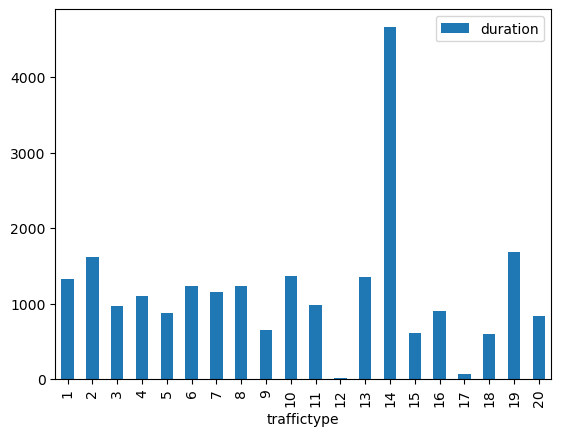

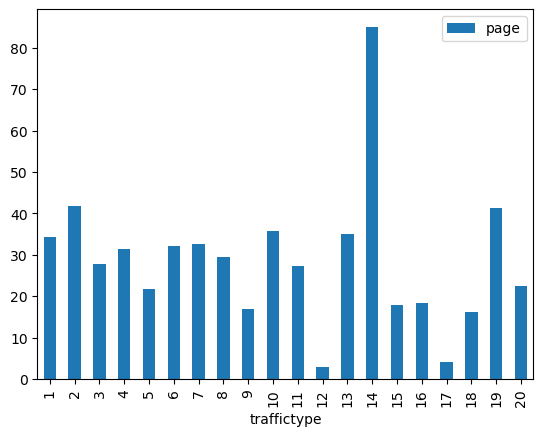

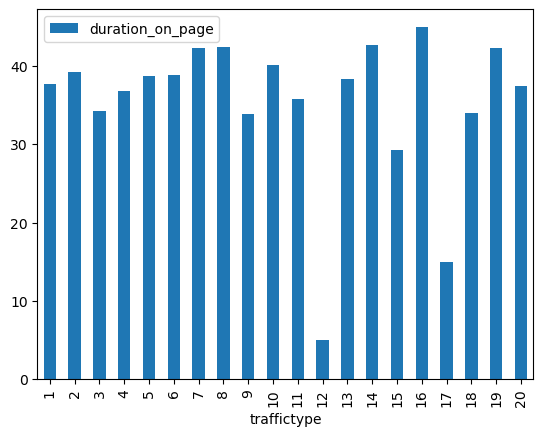

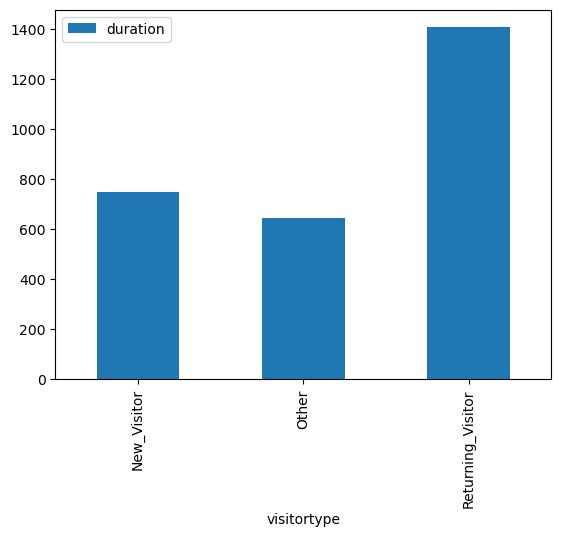

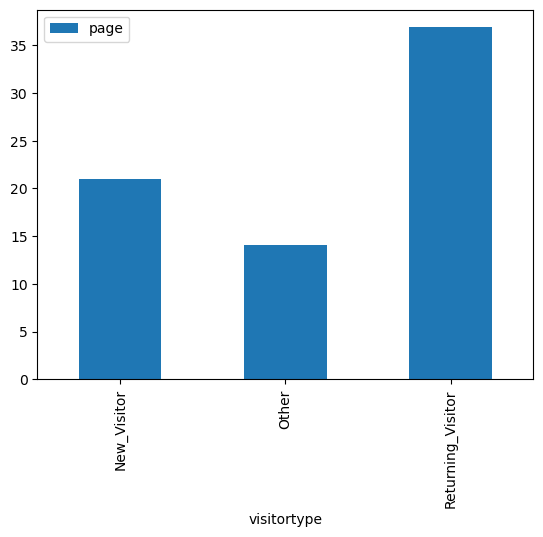

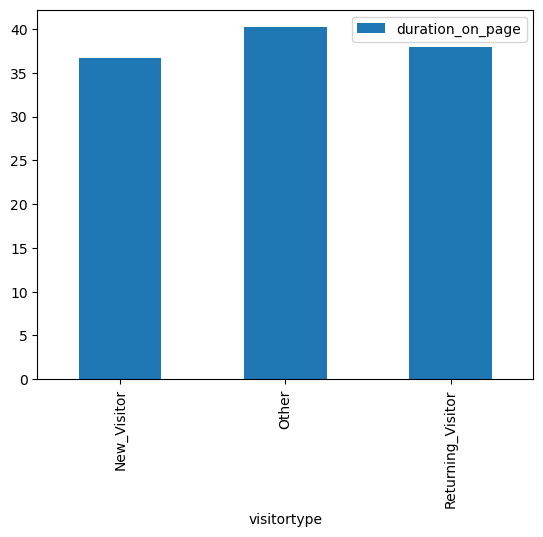

In [407]:
for i in ['traffictype', 'visitortype']:
    for c in ['duration', 'page', 'duration_on_page']:
        df.groupby(i)[c].mean().plot(kind='bar', label=c)
        plt.legend()
        plt.show();

In [451]:
df['traffictype'].value_counts()

traffictype
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

In [452]:
df[df['traffictype'] == 14]['revenue'].mean()

0.15384615384615385

In [463]:
traf_14_pages = round(df[df['traffictype'] == 14]['page'].mean())

print(f'Користувачі, які потрапили на сайт з джерела 14, в середньому переглядають {traf_14_pages} сторінок.')

Користувачі, які потрапили на сайт з джерела 14, в середньому переглядають 85 сторінок.


In [465]:
df.groupby('visitortype')['page'].mean()

visitortype
New_Visitor          20.940378
Other                14.117647
Returning_Visitor    36.899915
Name: page, dtype: float64

Користувачі, які потрапили на сайт з джерела "14", демонструють аномальне середнє значення кількості переглянутих сторінок (85 проти 35). При цьому їх середній час на сторінці не відрізняється від загальних показників. Загалом таких користувачів 13 осіб. Можна було б припустити, що це боти, які збирають інформацію у конкурентів, але конверсія в покупку у цих користувачів відповідає середньому значенню. Можливо, це діти, які мають багато вільного часу і проводять його за переглядом товарів.

Користувачі, які раніше використовували сайт, в середньому переглядають більше сторінок, ніж нові користувачі або користувачі з категорії "other" (36, 21, 14).

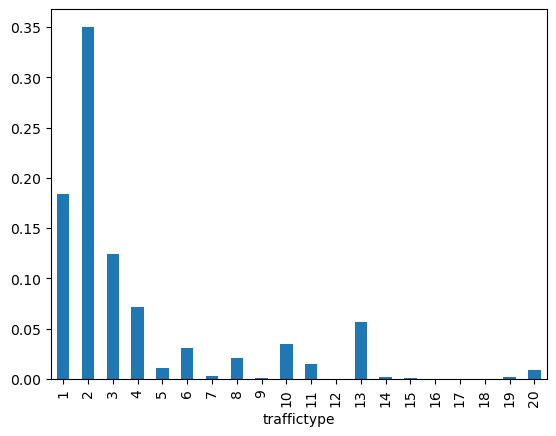

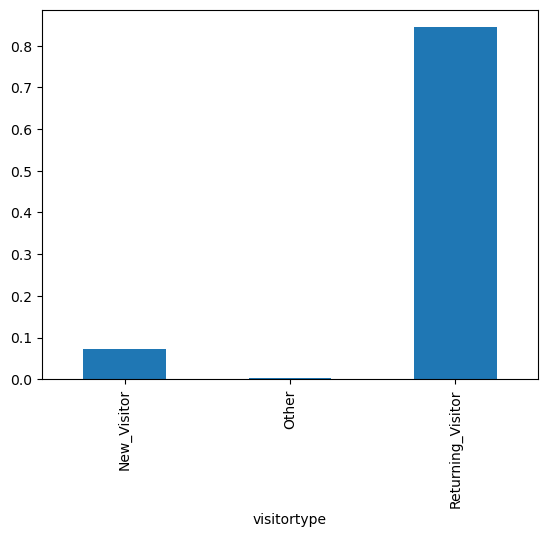

In [485]:
for i in ['traffictype', 'visitortype']:
    data = df[df['productrelated'] > 0].groupby(i)['productrelated'].sum() / df['page'].sum()
    data.plot(kind='bar')
    plt.show();

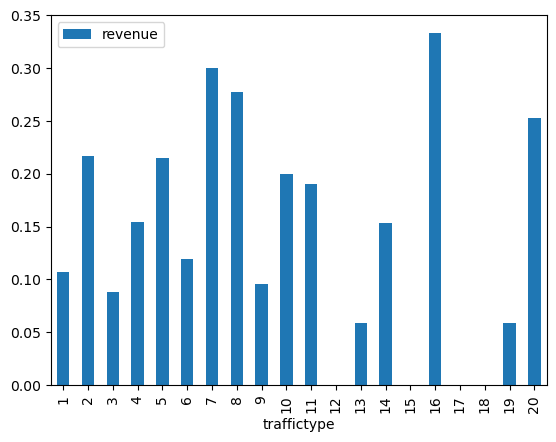

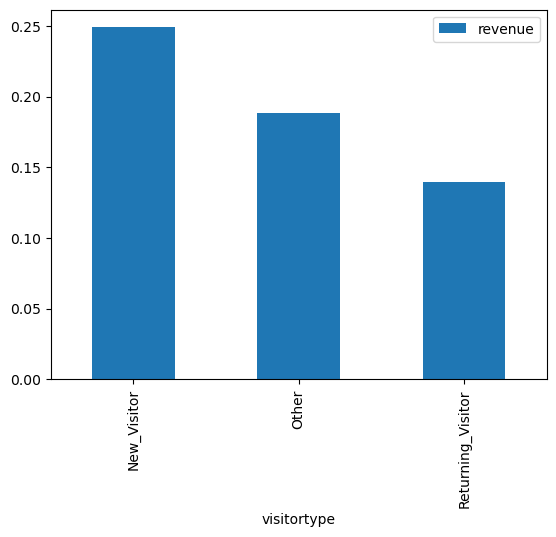

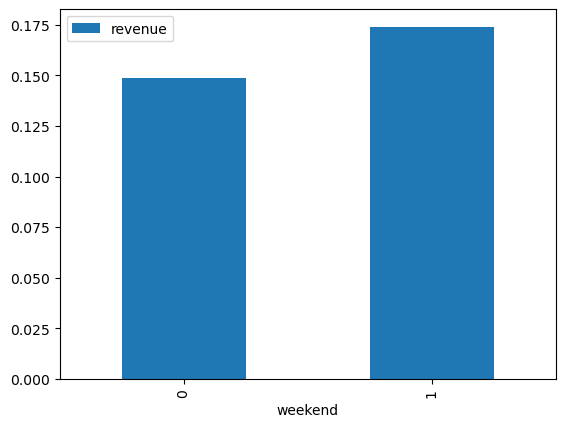

In [469]:
for i in ['traffictype', 'visitortype', 'weekend']:
    df.groupby(i)['revenue'].mean().plot(kind='bar', label='revenue')
    plt.legend()
    plt.show();

In [470]:
df.groupby('traffictype')['revenue'].mean()

traffictype
1     0.106895
2     0.216458
3     0.087719
4     0.154350
5     0.215385
6     0.119369
7     0.300000
8     0.276968
9     0.095238
10    0.200000
11    0.190283
12    0.000000
13    0.058266
14    0.153846
15    0.000000
16    0.333333
17    0.000000
18    0.000000
19    0.058824
20    0.252525
Name: revenue, dtype: float64

In [472]:
df.groupby('visitortype')['revenue'].mean()

visitortype
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: revenue, dtype: float64

In [473]:
df.groupby('weekend')['revenue'].mean()

weekend
0    0.148911
1    0.173989
Name: revenue, dtype: float64

Користувачі, які приходять з джерел 16, 7 і 8, демонструють найвищу конверсію в покупку(33%, 30% та 27% відповідно).

Найвища конверсія спостерігається серед нових користувачів та тих, хто потрапляє на сайт через категорію "other". Вони мають вищі показники, ніж користувачі, які відвідують сайт повторно (25%, 18%, 14%).

Також важливим є факт, що в вихідні дні конверсія зростає (17%, 15%).

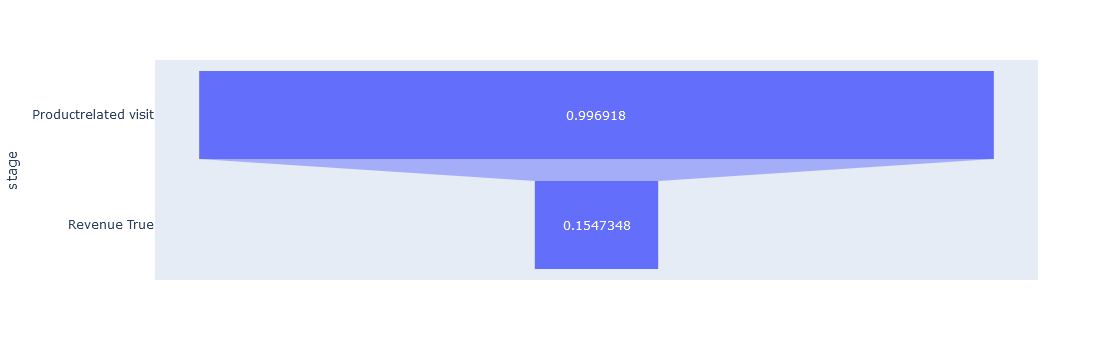

In [428]:
data = df[df['productrelated'] > 0]

prod_visit = data.shape[0] / df.shape[0]
revenue_true = data['revenue'].sum() / data.shape[0]

data = dict(
    number=[prod_visit, revenue_true],
    stage=['Productrelated visit', 'Revenue True'])
fig = px.funnel(data, x='number', y='stage')
fig.show();

Усі користувачі, які заходять на сайт, переглядають сторінки з товарами. 15% таких візитів завершується покупкою.

In [ ]:
Анализ конверсии по month
Сравнение трафика и конверсии в разные месяцы

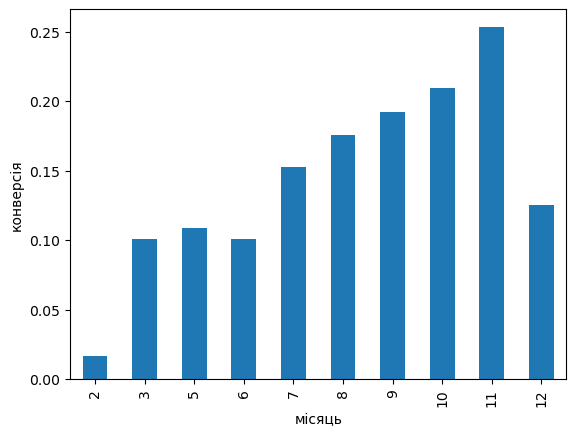

In [474]:
for i in ['month']:
    for c in ['revenue']:
        df.groupby(i)[c].mean().plot(kind='bar')
        plt.xlabel('місяць')
        plt.ylabel('конверсія')
        plt.show();

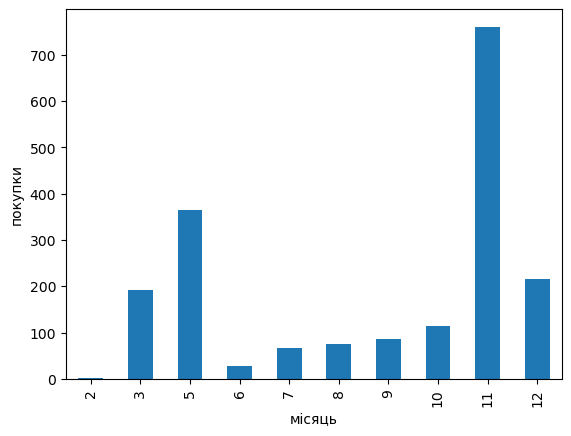

In [481]:
for i in ['month']:
    for c in ['revenue']:
        df.groupby(i)[c].sum().plot(kind='bar')
        plt.xlabel('місяць')
        plt.ylabel('покупки')
        plt.show();

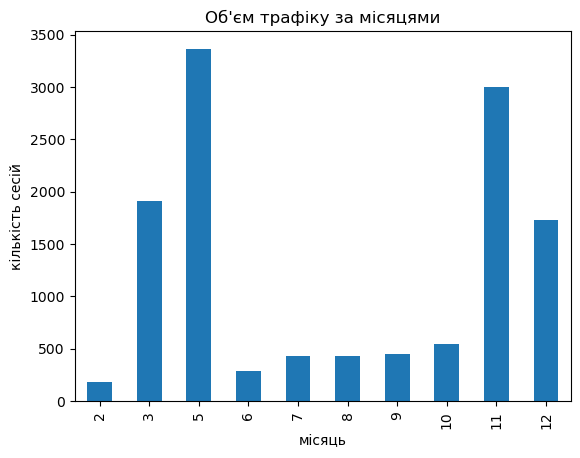

In [476]:
df.groupby('month').size().plot(kind='bar')
plt.title("Об'єм трафіку за місяцями")
plt.xlabel('місяць')
plt.ylabel('кількість сесій')
plt.show();

In [479]:
df.groupby('month')['revenue'].mean()

month
2     0.016304
3     0.100682
5     0.108502
6     0.100694
7     0.152778
8     0.175520
9     0.191964
10    0.209472
11    0.253502
12    0.125072
Name: revenue, dtype: float64

На початку та в кінці року спостерігалося велике число сесій від користувачів, але низька кількість покупок, що призвело до низької конверсії. У березні конверсія склала 10%, у травні — 10%, а в грудні — 12%.

У період з червня по жовтень спостерігалося зниження трафіку, але рівень продажів залишався на середньому рівні. Конверсія в цей період трималася на рівні 17%.

Особливо виділяється листопад, у якому було високе число сесій і велика кількість покупок. Конверсія в цьому місяці досягла 25%.

# 4. Висновки

Середній користувач проводить на сайті 1310 секунд.
За цей період він переглядає 35 сторінок, що в середньому становить 38 секунд на кожній сторінці.

Частка користувачів, які покинули сайт після перегляду лише однієї сторінки 55%

Конверсія в покупку становить 15%.


Користувачі, які потрапили на сайт з джерела "14", демонструють аномальне середнє значення кількості переглянутих сторінок (85 проти 35). При цьому їх середній час на сторінці не відрізняється від загальних показників. Загалом таких користувачів 13 осіб. Можна було б припустити, що це боти, які збирають інформацію у конкурентів, але конверсія в покупку у цих користувачів відповідає середньому значенню. Можливо, це діти, які мають багато вільного часу і проводять його за переглядом товарів.

Користувачі, які раніше використовували сайт, в середньому переглядають більше сторінок, ніж нові користувачі або користувачі з категорії "other" (36, 21, 14).


Користувачі, які приходять з джерел 16, 7 і 8, демонструють найвищу конверсію в покупку(33%, 30% та 27% відповідно).

Найвища конверсія спостерігається серед нових користувачів та тих, хто потрапляє на сайт через категорію "other". Вони мають вищі показники, ніж користувачі, які відвідують сайт повторно (25%, 18%, 14%).

Також важливим є факт, що в вихідні дні конверсія зростає (17%, 15%).


Усі користувачі, які заходять на сайт, переглядають сторінки з товарами. 15% таких візитів завершується покупкою.



На початку та в кінці року спостерігалося велике число сесій від користувачів, але низька кількість покупок, що призвело до низької конверсії. У березні конверсія склала 10%, у травні — 10%, а в грудні — 12%.

У період з червня по жовтень спостерігалося зниження трафіку, але рівень продажів залишався на середньому рівні. Конверсія в цей період трималася на рівні 17%.

Особливо виділяється листопад, у якому було високе число сесій і велика кількість покупок. Конверсія в цьому місяці досягла 25%.


#### **Рекомендації**

1. Попрацювати над головною сторінкою для зменшення відсотка сесій з покиданням після однієї сторінки (55%).
2. Фокусуватися на джерелах 16, 7 і 8, оскільки вони мають високу конверсію. Посилити маркетинг в цих каналах для збільшення продажів.
3. Розширити пропозиції для нових користувачів та категорії "other", оскільки вони мають вищу конверсію. Створити персоналізовані акції та пропозиції для залучення нових клієнтів.
4. Активно використовувати вихідні дні для маркетингових кампаній, оскільки в цей період конверсія зростає.
5. Проаналізувати сезонні коливання і збільшувати активність у місяцях з низькою конверсією (березень, травень, грудень) через спеціальні акції або пропозиції.